# Heart Attack Prediction Model

This notebook demonstrates the development of machine learning models to predict heart attack likelihood based on medical data.

## Setup and Installation

Install required dependencies:

In [48]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Data Loading

Download and load the heart attack dataset from Kaggle:

In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid")

print("Path to dataset files:", path)

Path to dataset files: /home/supreme2160/.cache/kagglehub/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid/versions/1


In [50]:
import pandas as pd

## Data Exploration

Explore the dataset to understand its structure and contents:

In [51]:
# Load the dataset
data = pd.read_csv(f"{path}/Medicaldataset.csv")
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [52]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [53]:
import seaborn as sns

## Data Visualization

Visualize relationships between features using pair plots:

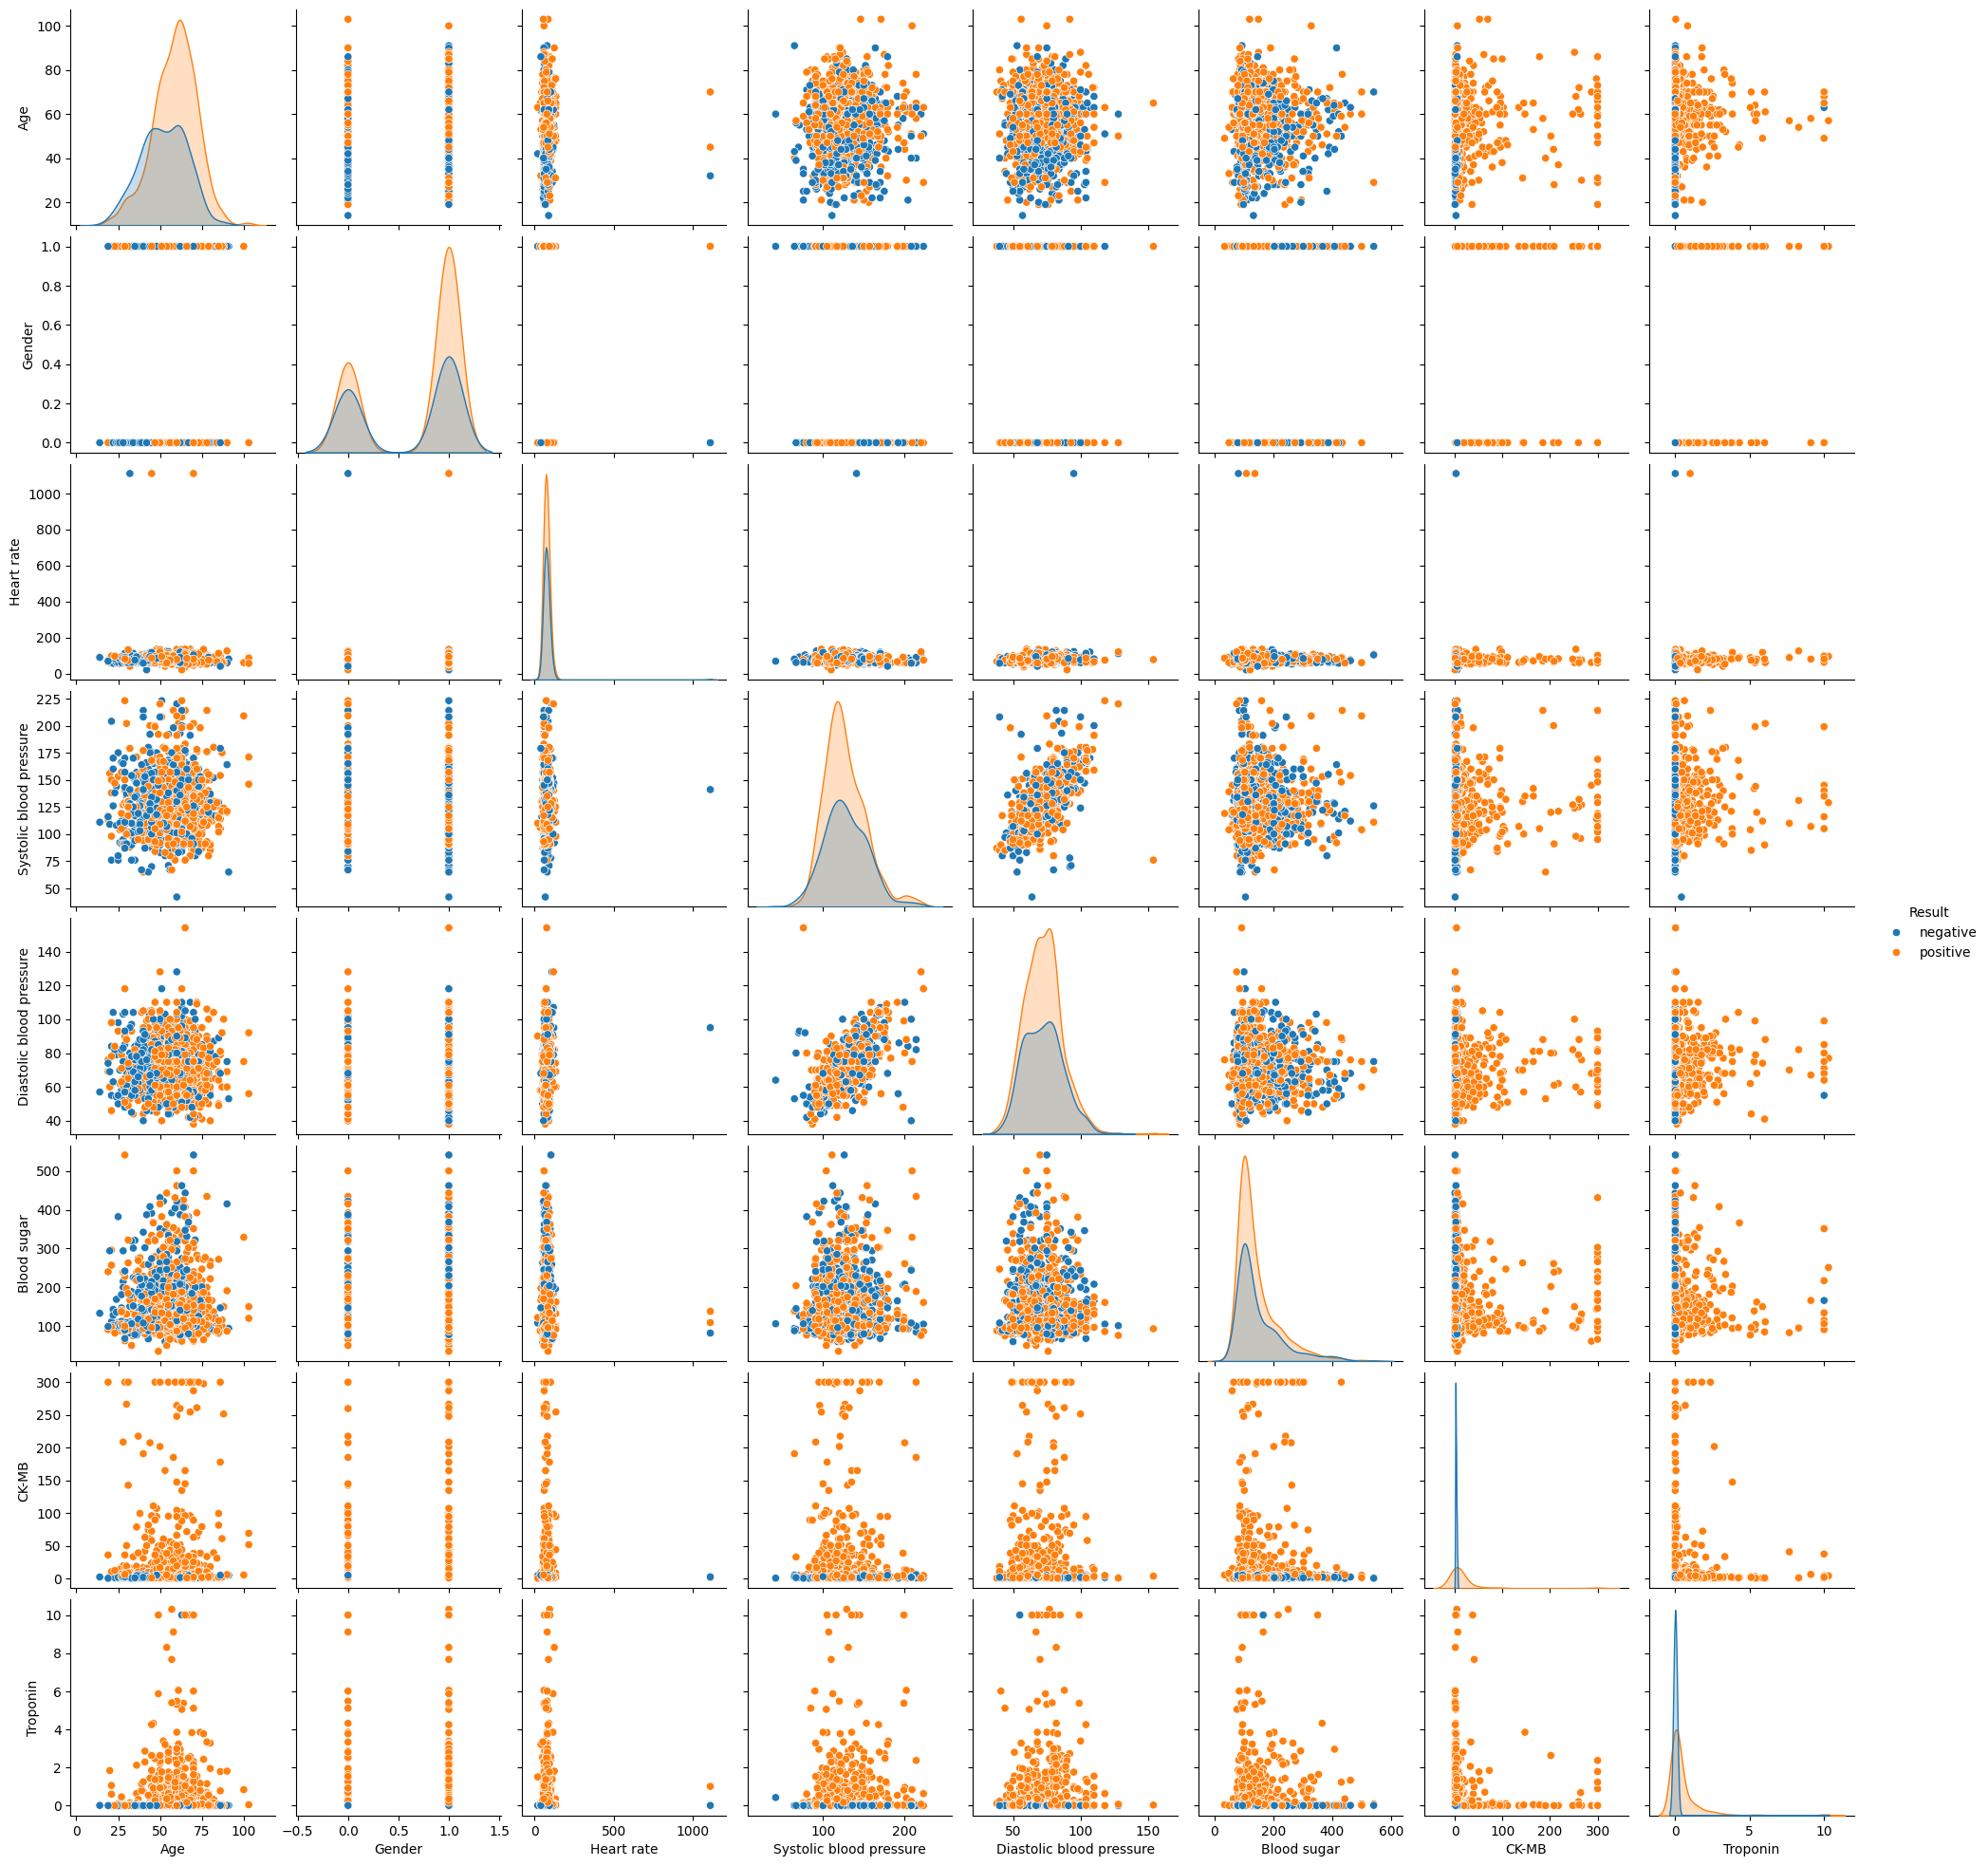

In [54]:
sns.pairplot(data.dropna(),hue='Result')


## Data Preparation

Split the data and prepare features for model training:

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X, Y = train_test_split(df, test_size=.25, random_state=42, shuffle=True)

In [57]:
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (989, 9)
Y shape: (330, 9)


In [58]:
independent_cols = ['Age', 'Gender','Heart rate', 'Systolic blood pressure','Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
dependent_col = 'Result'

In [59]:
X_train = X[independent_cols]
Y_train = X[dependent_col]
X_test = Y[independent_cols]
Y_test = Y[dependent_col]

In [60]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (989, 8)
Y_train shape: (989,)
X_test shape: (330, 8)
Y_test shape: (330,)


## Model 1: Logistic Regression

Train and evaluate a Logistic Regression model:

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [63]:
print("Accuracy of Logistic Regression model:", accuracy_score(Y_test, logreg.predict(X_test)))

Accuracy of Logistic Regression model: 0.7787878787878788


In [64]:
confusion_matrix(Y_test, logreg.predict(X_test))

array([[ 86,  42],
       [ 31, 171]])

In [65]:
print(classification_report(Y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.74      0.67      0.70       128
    positive       0.80      0.85      0.82       202

    accuracy                           0.78       330
   macro avg       0.77      0.76      0.76       330
weighted avg       0.78      0.78      0.78       330



## Model 2: Random Forest Classifier

Train and evaluate a Random Forest model:

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
print("Accuracy of Random Forest model:", accuracy_score(Y_test, rf_model.predict(X_test)))

Accuracy of Random Forest model: 0.9757575757575757


In [69]:
confusion_matrix(Y_test, rf_model.predict(X_test))

array([[123,   5],
       [  3, 199]])

In [70]:
print(classification_report(Y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.98      0.96      0.97       128
    positive       0.98      0.99      0.98       202

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.97       330
weighted avg       0.98      0.98      0.98       330



<h3>Xgboost</h3>

In [71]:
# Convert categorical dependent variable to numerical
df[dependent_col] = df[dependent_col].map({'positive':1,'negative':0})
print(df.head)

<bound method NDFrame.head of       Age  Gender  Heart rate  Systolic blood pressure  \
0      64       1          66                      160   
1      21       1          94                       98   
2      55       1          64                      160   
3      64       1          70                      120   
4      55       1          64                      112   
...   ...     ...         ...                      ...   
1314   44       1          94                      122   
1315   66       1          84                      125   
1316   45       1          85                      168   
1317   54       1          58                      117   
1318   51       1          94                      157   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin  Result  
0                           83        160.0   1.80     0.012       0  
1                           46        296.0   6.75     1.060       1  
2                           77        270.0   1.99     0.003

In [72]:
x, y = train_test_split(df, test_size=.25, random_state=42, shuffle=True)
x_train = x[independent_cols]
y_train = x[dependent_col]
x_test = y[independent_cols]
y_test = y[dependent_col]

In [86]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [87]:
print("Accuracy of model", accuracy_score(y_test, xgb_model.predict(x_test)))

Accuracy of model 0.9757575757575757


In [88]:
print(confusion_matrix(y_test, xgb_model.predict(x_test)))

[[123   5]
 [  3 199]]


In [89]:
print(classification_report(y_test, xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       128
           1       0.98      0.99      0.98       202

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.97       330
weighted avg       0.98      0.98      0.98       330



## Model Persistence

Save and load the Random Forest model:

In [90]:
# Save the models
import joblib
joblib.dump(rf_model, 'heart_attack_rf_model.pkl')
joblib.dump(logreg, 'heart_attack_logreg_model.pkl')
joblib.dump(xgb_model, 'heart_attack_xgb_model.pkl')

['heart_attack_xgb_model.pkl']

In [91]:
# Load the saved model
loaded_logreg_model = joblib.load('heart_attack_logreg_model.pkl')
loaded_rf_model = joblib.load('heart_attack_rf_model.pkl')

In [92]:
# Test the loaded model
print("Loaded Logistic Regression model accuracy:", accuracy_score(Y_test, loaded_logreg_model.predict(X_test)))
print("Loaded Random Forest model accuracy:", accuracy_score(Y_test, loaded_rf_model.predict(X_test)))
print("Loaded XGBoost model accuracy:", accuracy_score(y_test, xgb_model.predict(x_test)))

Loaded Logistic Regression model accuracy: 0.7787878787878788
Loaded Random Forest model accuracy: 0.9757575757575757
Loaded XGBoost model accuracy: 0.9757575757575757
